In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
print('\nLoading files ...')
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')
X = train.drop(['id', 'target'], axis=1).values
y = train['target'].values.astype(np.int8)
target_names = np.unique(y)
print('\nThere are %d unique target valuess in this dataset:' % (len(target_names)), target_names)


Loading files ...

There are 2 unique target valuess in this dataset: [0 1]


In [3]:
n_comp = 20
# PCA
print('\nRunning PCA ...')
pca = PCA(n_components=n_comp, svd_solver='full', random_state=1001)
X_pca = pca.fit_transform(X)
print('Explained variance: %.4f' % pca.explained_variance_ratio_.sum())

print('Individual variance contributions:')
for j in range(n_comp):
    print(pca.explained_variance_ratio_[j])


Running PCA ...
Explained variance: 0.9944
Individual variance contributions:
0.907732701885
0.0254234063215
0.0110337289521
0.0070268753562
0.00628341600314
0.00611974772924
0.00535864726681
0.00453274019813
0.00362930731976
0.00294262288265
0.00239246012144
0.00177464330232
0.00166653490752
0.00151185737228
0.00148285378183
0.00129501399992
0.00120521481347
0.0010727631062
0.00103952906349
0.000841552767779


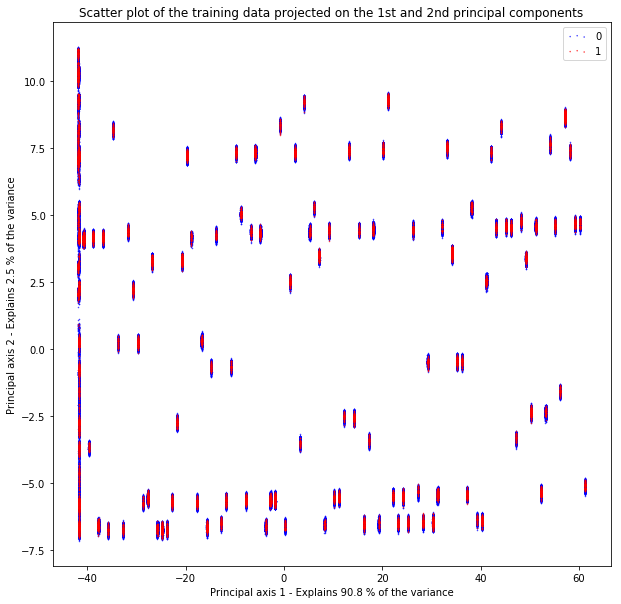

In [4]:
colors = ['blue', 'red']
plt.figure(1, figsize=(10, 10))

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, s=1,
                alpha=.8, label=target_name, marker='.')
plt.legend(loc='best', shadow=False, scatterpoints=3)
plt.title(
        "Scatter plot of the training data projected on the 1st "
        "and 2nd principal components")
plt.xlabel("Principal axis 1 - Explains %.1f %% of the variance" % (
        pca.explained_variance_ratio_[0] * 100.0))
plt.ylabel("Principal axis 2 - Explains %.1f %% of the variance" % (
        pca.explained_variance_ratio_[1] * 100.0))

plt.savefig('pca-porto-01.png', dpi=150)
plt.show()

In [ ]:
tsne = TSNE(n_components=2, init='pca', random_state=1001, perplexity=30, method='barnes_hut', n_iter=1000, verbose=1)
X_tsne = tsne.fit_transform(X) # this will either fail or take a while (most likely overnight)

plt.figure(2, figsize=(10, 10))

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1], color=color, s=1,
                alpha=.8, label=target_name, marker='.')
plt.legend(loc='best', shadow=False, scatterpoints=3)
plt.title('Scatter plot of t-SNE embedding')
plt.xlabel('X')
plt.ylabel('Y')

plt.savefig('t-SNE-porto-01.png', dpi=150)
plt.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 595212 samples in 18.424s...
